<a href="https://colab.research.google.com/github/Proj-Caliber/Job-Care/blob/Choiyonje/JobCare_Final_220123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Final

## Load Data

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import sklearn as sk
warnings.filterwarnings("ignore")
import os
import sys
import platform


#original given files
train= pd.read_csv('/content/drive/MyDrive/잡케어/train (5).csv')
test= pd.read_csv('/content/drive/MyDrive/잡케어/test (2).csv')

d_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_D_코드.csv', index_col=0).T.to_dict()
h_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_H_코드.csv', index_col=0).T.to_dict()
l_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_L_코드.csv', index_col=0).T.to_dict()

sub= pd.read_csv('/content/drive/MyDrive/잡케어/sample_submission.csv')

In [72]:
print(f"- os: {platform.platform()}")
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('sklearn : %s'%(sk.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
print('seaborn : %s'%(sns.__version__))
!python --version

- os: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Pandas : 1.1.5
Numpy : 1.19.5
sklearn : 1.0.2
matplotlib : 3.2.2
seaborn : 0.11.2
Python 3.7.12


##Data PreProcessing

# Adding D,H,L

In [73]:
# 출처 
#https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent 코드 사용

def add_code(df, d_code, h_code, l_code):

  #n : 세분류, s: 소분류, m: 중분류, l: 대분류
  df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  # H Code
  df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

  df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 

  return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

# Missing Val, Duplicated 확인

In [74]:
train.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
person_prefer_d_1_n 

In [75]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
person_prefer_d_1_n       0
person_prefer_d_1_s 

In [76]:
train.duplicated().unique()

array([False])

In [77]:
test.duplicated().unique()

array([False])

# Data Type 확인

> Object Type, Boolean Type 변환

In [78]:
print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())

train dtypes: int64     52
bool       6
object     1
dtype: int64
-------------
test dtypes: int64     51
bool       6
object     1
dtype: int64


int, bool, object type 존재하는 것을 확인했다.

Model Fiting을 위해 bool, object Type을 int로 변환해줌.

In [79]:
#Boolean
def booltoint(df):
  df['d_l_match_yn']=df.d_l_match_yn.astype(int)
  df['d_m_match_yn']=df.d_m_match_yn.astype(int)
  df['d_s_match_yn']=df.d_s_match_yn.astype(int)
  df['h_l_match_yn']=df.h_l_match_yn.astype(int)
  df['h_m_match_yn']=df.h_m_match_yn.astype(int)
  df['h_s_match_yn']=df.h_s_match_yn.astype(int)

  
booltoint(train)
booltoint(test)

In [80]:
print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())

train dtypes: int64     58
object     1
dtype: int64
-------------
test dtypes: int64     57
object     1
dtype: int64


In [81]:
train.head()
#True, False > 1, 0으로 변경

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m
0,0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422
1,1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417
2,2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363
3,3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381
4,4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381


In [82]:
#2. Object Type
def objtoint(df):
  # pd.to_datetime 이용해서 변경
  df['contents_open_dt']= pd.to_datetime(df.contents_open_dt, format='%Y-%m-%d %H:%M:%S' )
  df['contents_open_dt_year']= df['contents_open_dt'].dt.year.astype(int)
  df['contents_open_dt_month']=df['contents_open_dt'].dt.month.astype(int)
  df['contents_open_dt_day']=df['contents_open_dt'].dt.day.astype(int)
  df['contents_open_dt_hour']=df['contents_open_dt'].dt.hour.astype(int)
  df['contents_open_dt_minute']=df['contents_open_dt'].dt.minute.astype(int)
  df['contents_open_dt_sec']= df['contents_open_dt'].dt.second.astype(int)

In [83]:
objtoint(train)
objtoint(test)

In [84]:
# date 변수로 새로운 변수 생성 > weekday, weekend
def get_weekdays(df):
  df['weekday']= df['contents_open_dt'].apply(lambda x: x.weekday())
  df['weekend']= df['weekday'].copy()
  df['weekend']= df['weekend'].apply(lambda x:1 if x>4 else 0)

get_weekdays(train)
get_weekdays(test)

In [85]:
#dropping contents_open_dt
train.drop('contents_open_dt',axis=1, inplace=True)
test.drop('contents_open_dt',axis=1, inplace=True)

In [86]:
#Final Data Type Checking

print('train dtypes:',train.dtypes.value_counts())
print('-------------')
print('test dtypes:',test.dtypes.value_counts())
# int type으로 변경.

train dtypes: int64    66
dtype: int64
-------------
test dtypes: int64    65
dtype: int64


# Dropping Unnecessary Columns

1. single value columns > person_prefer_f, person_prefer_g, contents_open_dt_year
2. id

In [87]:
# 각 column 내의 값을 조회 했을 때, single value인 col들이 존재하는가?
train_nu= pd.DataFrame(train.nunique())
test_nu=pd.DataFrame(test.nunique())

print(train_nu[train_nu[0]<2])
print('--------------------------')
print(test_nu[test_nu[0]<2])

#Train, Test 공통적으로 person_prefer_f, person_prefer_g, contents_open_dt_year
#이 single val. 실질적인 분석에 도움이 되지 않는다 판단하여 drop

                       0
person_prefer_f        1
person_prefer_g        1
contents_open_dt_year  1
--------------------------
                        0
person_prefer_f         1
person_prefer_g         1
contents_open_dt_year   1
contents_open_dt_month  1


In [88]:
#id 또한 필요없다 판단하여 같이 drop
def droppings(df):
  df.drop('person_prefer_f',axis=1,inplace=True)
  df.drop('person_prefer_g',axis=1, inplace=True)
  df.drop('contents_open_dt_year',axis=1,inplace=True)
  df.drop('id',axis=1, inplace=True)


droppings(train)
droppings(test)

In [89]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_

# train, test의 nunique 값 확인

In [90]:
train_nu= pd.DataFrame(train.nunique())
test_nu=pd.DataFrame(test.nunique())

In [91]:
train_nu

,0
d_l_match_yn,2
d_m_match_yn,2
d_s_match_yn,2
h_l_match_yn,2
h_m_match_yn,2
...,...
contents_open_dt_hour,24
contents_open_dt_minute,60
contents_open_dt_sec,60
weekday,7


> 각 col에 너무 많은 feature가 존재하면, dummy화 시켰을 때 sparse 해짐. > mean target encoding 시도

# Mean Target Encoding

참고 : https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study

In [92]:
pp_d_1_mean= train.groupby('person_prefer_d_1')['target'].mean()
pp_d_2_mean= train.groupby('person_prefer_d_2')['target'].mean()
pp_d_3_mean= train.groupby('person_prefer_d_3')['target'].mean()

pp_h_1_mean= train.groupby('person_prefer_h_1')['target'].mean()
pp_h_2_mean= train.groupby('person_prefer_h_2')['target'].mean()
pp_h_3_mean= train.groupby('person_prefer_h_3')['target'].mean()

ca_l_mean= train.groupby('contents_attribute_l')['target'].mean()
ca_d_mean= train.groupby('contents_attribute_d')['target'].mean()
ca_h_mean= train.groupby('contents_attribute_h')['target'].mean()

In [93]:
def mappings(df):
  df['person_prefer_d_1_encoded']= df['person_prefer_d_1'].map(pp_d_1_mean)
  df['person_prefer_d_2_encoded']= df['person_prefer_d_2'].map(pp_d_2_mean)
  df['person_prefer_d_3_encoded']= df['person_prefer_d_3'].map(pp_d_3_mean)

  df['person_prefer_h_1_encoded']= df['person_prefer_h_1'].map(pp_h_1_mean)
  df['person_prefer_h_2_encoded']= df['person_prefer_h_2'].map(pp_h_2_mean)
  df['person_prefer_h_3_encoded']= df['person_prefer_h_3'].map(pp_h_3_mean)

  df['contents_attribute_l_encoded'] = df['contents_attribute_l'].map(ca_l_mean)
  df['contents_attribute_d_encoded'] = df['contents_attribute_d'].map(ca_d_mean)
  df['contents_attribute_h_encoded']= df['contents_attribute_h'].map(ca_h_mean)
mappings(train)
mappings(test)

In [94]:
# 기존의 col을 replace 해야하기 때문에, 기존 col들 drop

train.drop(['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l','contents_attribute_d','contents_attribute_h'],axis=1,inplace=True)
test.drop(['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l','contents_attribute_d','contents_attribute_h'],axis=1,inplace=True)

In [95]:
#train, test에 다 적용
print(train.shape)
print(test.shape)

(501951, 62)
(46404, 61)


# dummy 변수

feature가 10개 이하이며, train과 test의 각 col 모두 동일한 갯수의 피쳐를 가지며, 명목형(순서형 x)인 조건으로 

['person_prefer_c','contents_attribute_i',
'contents_attribute_a','contents_attribute_j_1',
'contents_attribute_c', 'contents_attribute_m']

columns들을 dummy화 시킴.

In [96]:
dum_df= ['person_prefer_c','contents_attribute_i',
         'contents_attribute_a','contents_attribute_j_1',
         'contents_attribute_c', 'contents_attribute_m']

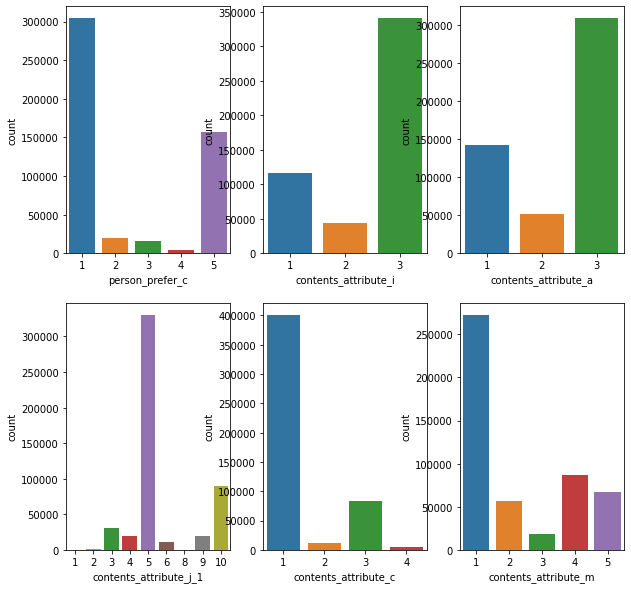

In [97]:
plt.figure(figsize=(10,10))
for i,j in zip(range(len(dum_df)),dum_df):
  plt.subplot(2,3,i+1)
  sns.countplot(train[j])

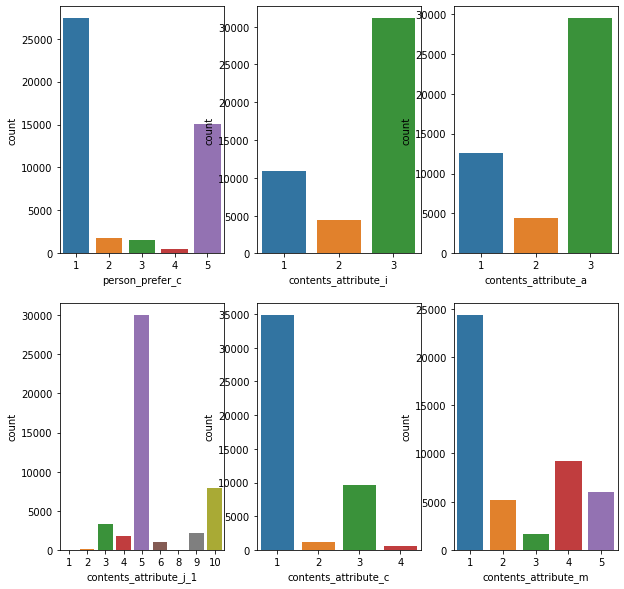

In [98]:
plt.figure(figsize=(10,10))
for i,j in zip(range(len(dum_df)),dum_df):
  plt.subplot(2,3,i+1)
  sns.countplot(test[j])

In [99]:
train=pd.get_dummies(train, columns=dum_df, drop_first=True)


test=pd.get_dummies(test, columns=dum_df, drop_first=True)

In [100]:
print(train.shape)
print(test.shape)

(501951, 79)
(46404, 78)


#cyclic Encoding

참고 : https://www.kaggle.com/shahules/an-overview-of-encoding-techniques

some features are in cyclic 형태. ex) month, year etc.
a common method for encoding cyclic data is to transform the data into two dimensions using a sine and cosine transformation

In [101]:
#month는 제외(train, test가 다르기 때문)
#weekday 포함 할지에 대한 여부
date_cols= ['contents_open_dt_day','contents_open_dt_hour',
             'contents_open_dt_minute','contents_open_dt_sec','weekday']

def cyclic_feat(df,cols):
  for col in cols:
    df[col+'_sin']= np.sin((2*np.pi*df[col])/max(df[col]))
    df[col+'_cos']= np.cos((2*np.pi*df[col])/max(df[col]))

  df.drop(cols, axis=1,inplace=True)

In [102]:
cyclic_feat(train,date_cols)
cyclic_feat(test,date_cols)

#Train Test Split

In [103]:
!pip install catboost

In [104]:
from sklearn import metrics
from sklearn.metrics import f1_score, auc, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [115]:
seed = 42
x= train.drop('target',axis=1)
y= train.target

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=seed)

In [36]:
cbc= CatBoostClassifier(random_state=seed,verbose=False)
xgb= XGBClassifier(random_state=seed)
lgbm= LGBMClassifier(random_state=seed)
forest= RandomForestClassifier(random_state=seed)
ada= AdaBoostClassifier(random_state=seed)
etc= ExtraTreesClassifier(random_state=seed)

model_list= [cbc, xgb, lgbm, forest, ada, etc]

In [37]:
for model in model_list:
  model.fit(x_train,y_train)
  y_pred= model.predict(x_test)
  print(model, ":", f1_score(y_test, y_pred),'\n', confusion_matrix(y_pred, y_test))

<catboost.core.CatBoostClassifier object at 0x7f7049a63950> : 0.6517898918139544 
 [[29794 16102]
 [20365 34130]]
XGBClassifier(random_state=42) : 0.631482834185537 
 [[29198 17381]
 [20961 32851]]
LGBMClassifier(random_state=42) : 0.6451133973523169 
 [[29210 16340]
 [20949 33892]]
RandomForestClassifier(random_state=42) : 0.6332602446036155 
 [[30267 17741]
 [19892 32491]]
AdaBoostClassifier(random_state=42) : 0.6171780942592865 
 [[29753 18705]
 [20406 31527]]
ExtraTreesClassifier(random_state=42) : 0.6243363311301333 
 [[30563 18541]
 [19596 31691]]


#Optuna Try

baseline : https://github.com/optuna/optuna-examples/blob/main/catboost/catboost_simple.py

param explanation: https://catboost.ai/en/references/training-parameters/common#boosting_type

In [38]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 209 kB 49.1 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 112 kB 33.9 MB/s 
     |████████████████████████████████| 149 kB 51.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=64889ba2ca6773a954654284710cdfce1485fd25d8c3a875515e34b9c6e55608
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [39]:
import optuna

In [52]:
def objective(trial):
  x= train.drop('target',axis=1)
  y= train['target']

  x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.1, random_state=seed)

  param= {
      'learning_rate': trial.suggest_float('learning_rate',0.01, 0.1),
      'depth' : trial.suggest_int('depth', 1, 12),
      'boosting_type': trial.suggest_categorical('boosting_type',['Ordered','Plain']),
      # "bootstrap_type": trial.suggest_categorical(
      #     "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
  }

  # if param["bootstrap_type"] == "Bayesian":
  #   param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  # elif param["bootstrap_type"] == "Bernoulli":
  #   param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

  model= CatBoostClassifier(**param, random_state=seed)

  model.fit(x_train,y_train, verbose=False, early_stopping_rounds= 100)

  y_pred= model.predict(x_test)
  f1= f1_score(y_pred, y_test)
  return f1

In [50]:
study= optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-01-24 06:48:35,568] A new study created in memory with name: no-name-1c331bc2-078d-42a5-8ba9-a3595bdd452d
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2022-01-24 06:50:12,520] Trial 0 finished with value: 0.6300524170064066 and parameters: {'learning_rate': 0.06720492538040357, 'depth': 2}. Best is trial 0 with value: 0.6300524170064066.
[I 2022-01-24 06:52:20,221] Trial 1 finished with value: 0.643269249199747 and parameters: {'learning_rate': 0.08103090312026219, 'depth': 4}. Best is trial 1 with value: 0.643269249199747.
[I 2022-01-24 06:54:27,908] Trial 2 finished with value: 0.6403268186961775 and parameters: {'learning_rate': 0.04137541729894808, 'depth': 4}. Best is trial 1 with value: 0.643269249199747.
[I 2022-01-24 07:07:42,737] Trial 3 finished with value: 0.6461994495024349 and parameters: {'learning_rate': 0.06066768267594334, 'depth': 11}. Best is trial 3 with value: 0.6461994495024349.


Number of finished trials: 4
Best trial:
  Value: 0.6461994495024349
  Params: 
    learning_rate: 0.06066768267594334
    depth: 11


#GridSearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

cbc= CatBoostClassifier(random_state=seed, verbose=False)

params= {
    'learning_rate' :[0.001, 0.01, 0.1],
    'boosting_type':['Plain','Ordered'],
    'max_depth':[5,10,15],
    'n_estimators':[100,200,300],
}

grid= GridSearchCV(cbc, param_grid=params, cv=5, scoring='f1')
grid.fit(x_train,y_train)

print('best parameters : ', grid.best_params_)
print('best score : ', grid.best_score_)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.